<a href="https://colab.research.google.com/github/rjain125/Week-2--Stock-prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#matrix math and data processing
import math
import numpy as np

#for data formatting
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
sns.set()

#Import scikit dependencies
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




In [0]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=56c0af322e986200ddeab99ba8899b126c533a6bbac5ef6b589bb775c711d2cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-3djbrr9c/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
from google.colab import drive
drive.mount('drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

yf.pdr_override()
dataframe = pdr.get_data_yahoo('AAPL', start="2015-01-01").reset_index()
dataframe.to_csv('AAPL.csv', index=False)
dataframe.head()



[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,100.755898,53204600
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,97.917427,64285500
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,97.926666,65797100
3,2015-01-07,107.199997,108.199997,106.699997,107.750000,99.299805,40105900
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,103.115128,59364500


In [0]:
dataframe = pd.read_csv('AAPL.csv')

In [0]:
dataframe.set_index('Date', inplace=True)
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,100.755898,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,97.917427,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,97.926666,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,99.299805,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,103.115128,59364500


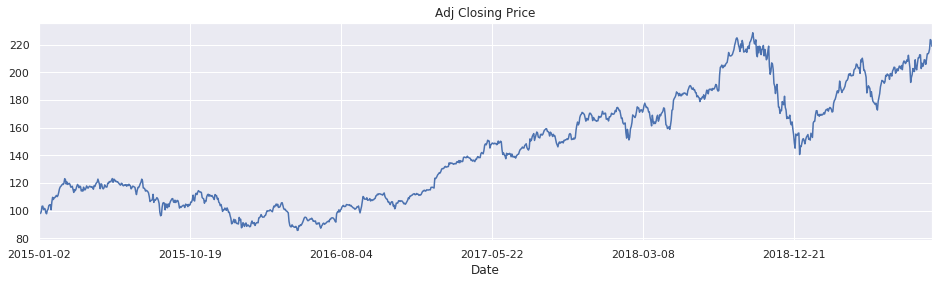

In [0]:
dataframe['Adj Close'].plot(label='AAPL', figsize=(16,4), title='Adj Closing Price', grid=True)

In [0]:

dataframereg = dataframe.loc[:,['Adj Close','Volume']]
dataframereg['HL_PCT'] = (dataframe['High'] - dataframe['Low']) / dataframe['Close'] * 100.0
dataframereg['PCT_change'] = (dataframe['Close'] - dataframe['Open']) / dataframe['Open'] * 100.0
dataframereg.head()





,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2015-01-02,100.755898,53204600,3.740971,-1.849355
2015-01-05,97.917427,64285500,3.049410,-1.883831
2015-01-06,97.926666,65797100,2.635049,-0.262811
2015-01-07,99.299805,40105900,1.392111,0.513063
2015-01-08,103.115128,59364500,3.083390,2.435225


In [0]:
dataframereg.fillna(value=-99999, inplace=True)

print(dataframereg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dataframereg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dataframereg['label'] = dataframereg[forecast_col].shift(-forecast_out)
X = np.array(dataframereg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dataframereg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)


(1183, 4)
Dimension of X (1171, 4)
Dimension of y (1171,)


In [0]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
#Building the model

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

#Lasso Regression
clflasso = linear_model.Lasso(alpha=0.1)
clflasso.fit(X_train, y_train)





Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#Testing the model

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
confidencelasso = clflasso.score(X_test,y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)
print("The lasso regression confidence is ",confidencelasso)

The linear regression confidence is  0.9565671472199934
The quadratic regression 2 confidence is  0.9570887841007139
The quadratic regression 3 confidence is  0.4992603687742395
The knn regression confidence is  0.9114429139983705
The lasso regression confidence is  0.9565158214087828


[206.37029432 209.67118205 209.89954004 206.78819476 209.83235047
 213.45295451 214.10057587 214.9271909  216.30900666 221.76474441
 223.24196775 218.46227657] 0.9565671472199934 12


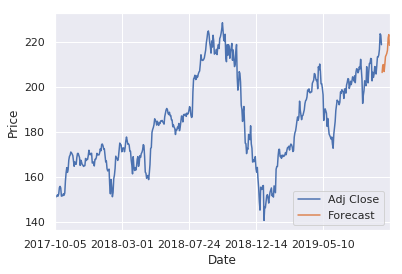

In [0]:
#1. Prediction using linear regression

# Printing the forecast 
forecast_set = clfreg.predict(X_lately)
df_linear = dataframereg.copy()
df_linear['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

#Plotting the prediction
#print(df_linear.iloc[-1])
last_date = df_linear.iloc[-1].name
#print(last_date)
#print(datetime.timedelta(days=1))
format_str = '%Y-%m-%d'
last_unix = datetime.datetime.strptime(last_date, format_str)
next_unix =  last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_linear.loc[next_date] = [np.nan for _ in range(len(df_linear.columns)-1)]+[i]


df_linear['Adj Close'].tail(500).plot()
df_linear['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[207.00010747 209.19593796 209.83475111 206.97373512 209.47923502
 211.72591914 213.49293646 214.05071761 213.04117844 213.48196872
 219.6903264  214.21253346] 0.9570887841007139 12


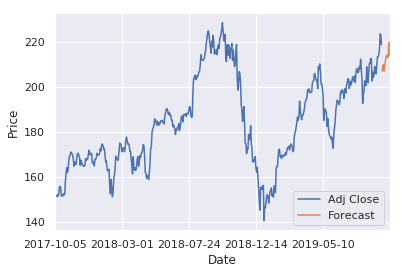

In [0]:
# 2. Prediction using Quadratic regression 2

# Printing the forecast 
forecast_set = clfpoly2.predict(X_lately)
df_poly2 = dataframereg.copy()
df_poly2['Forecast'] = np.nan
print(forecast_set, confidencepoly2, forecast_out)

#Plotting the prediction

last_date = df_poly2.iloc[-1].name
format_str = '%Y-%m-%d'
last_unix = datetime.datetime.strptime(last_date, format_str)
next_unix =  last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_poly2.loc[next_date] = [np.nan for _ in range(len(df_linear.columns)-1)]+[i]


df_poly2['Adj Close'].tail(500).plot()
df_poly2['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[207.72012927 209.56530938 212.03962267 208.75406425 209.63986073
 210.59496252 214.99121871 214.63391546 209.59041305 209.11279435
 219.70590369 213.24874074] 0.4992603687742395 12


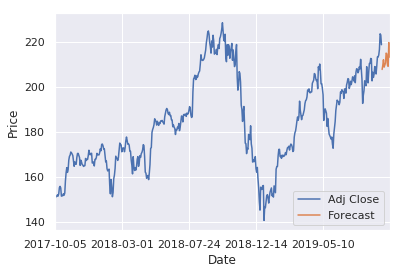

In [0]:
# 3. Prediction using Quadratic regression 3

# Printing the forecast 
forecast_set = clfpoly3.predict(X_lately)
df_poly3 = dataframereg.copy()
df_poly3['Forecast'] = np.nan
print(forecast_set, confidencepoly3, forecast_out)

#Plotting the prediction

last_date = df_poly3.iloc[-1].name
format_str = '%Y-%m-%d'
last_unix = datetime.datetime.strptime(last_date, format_str)
next_unix =  last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_poly3.loc[next_date] = [np.nan for _ in range(len(df_linear.columns)-1)]+[i]


df_poly3['Adj Close'].tail(500).plot()
df_poly3['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[204.1551365 214.699722  190.53125   194.212105  217.711601  207.2569505
 215.9309615 201.6298525 204.1557085 202.74572   220.0552445 222.2856295] 0.9114429139983705 12


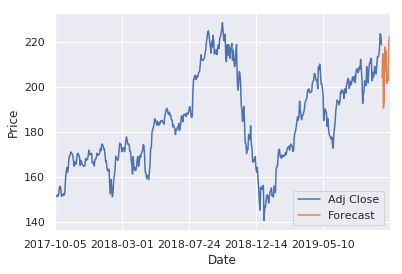

In [0]:
# 4. Prediction using KNN


# Printing the forecast 
forecast_set = clfknn.predict(X_lately)
df_knn = dataframereg.copy()
df_knn['Forecast'] = np.nan
print(forecast_set, confidenceknn, forecast_out)

#Plotting the prediction

last_date = df_knn.iloc[-1].name
format_str = '%Y-%m-%d'
last_unix = datetime.datetime.strptime(last_date, format_str)
next_unix =  last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_knn.loc[next_date] = [np.nan for _ in range(len(df_linear.columns)-1)]+[i]


df_knn['Adj Close'].tail(500).plot()
df_knn['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[206.2499287  209.56928282 209.63646817 206.59687632 209.78227843
 213.46919575 214.02987409 214.52154863 216.17313661 221.85308392
 223.15597942 218.47953889] 0.9565158214087828 12


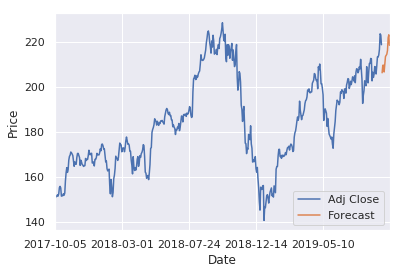

In [0]:
#  5.Prediction using Lasso regression 

# Printing the forecast 
forecast_set = clflasso.predict(X_lately)
df_lasso = dataframereg.copy()
df_lasso['Forecast'] = np.nan
print(forecast_set, confidencelasso, forecast_out)

#Plotting the prediction

last_date = df_lasso.iloc[-1].name
format_str = '%Y-%m-%d'
last_unix = datetime.datetime.strptime(last_date, format_str)
next_unix =  last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_lasso.loc[next_date] = [np.nan for _ in range(len(df_linear.columns)-1)]+[i]


df_lasso['Adj Close'].tail(500).plot()
df_lasso['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Agents

*Turtle trading agent
*Moving average agent
*Signal Rolling Agent

--pure reinforcement learning agents
*Policy Gradient agent
*Q-learning agent

--Evolutionary 
*Evolutionary Strategy agent

--Deep reinforcement Learning
Double Q-learning agent
Recurrent Q-learning agent
Double Recurrent Q-learning agent
Duel Q-learning agent
Double Duel Q-learning agent
Duel Recurrent Q-learning agent
Double Duel Recurrent Q-learning agent
Actor-critic agent
Actor-critic Duel agent
Actor-critic Recurrent agent
Actor-critic Duel Recurrent agent
Curiosity Q-learning agent
Recurrent Curiosity Q-learning agent
Duel Curiosity Q-learning agent
Neuro-evolution agent
Neuro-evolution with Novelty search agent
ABCD strategy agent
Deep Evolution Strategy





#Task

--Create a reinforcement learning agent to predict stock prices 

-import dependencies
-import datasets
-define agent algorithm
-make predictions
-plot predictions
